### Get scale limit for a mobile re-captured image
1. Zoom in initial scale.
2. Crop image w/ current scale.
3. Execute FFT & calculate wave length of the cropped image.
4. Get pixel width in x-y axes.
5. Optimize scale to obtain 10-pixel width and 10-pixel height (iterate Step 2 to 4).

Reading image to align :  snipping/source.png


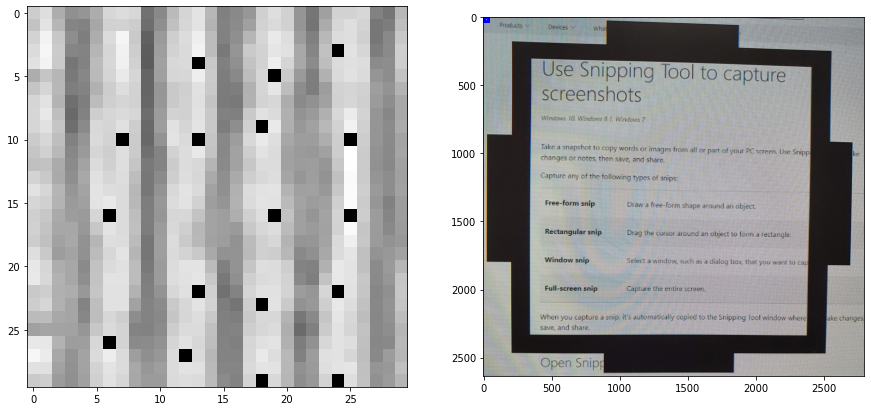

In [47]:
from pre_process import *
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.feature import peak_local_max

dirName = "snipping"
imFilename = os.path.join(dirName, "source.png")

print("Reading image to align : ", imFilename);  
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

pim = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
height, width = pim.shape
n_pixel = 5
        
coordinates = np.array(peak_local_max(pim, min_distance=3))
N = coordinates.shape[0]

d = np.sqrt(width*height/N)
    
nx, ny = tuple(np.array([width, height]) // int(d * n_pixel))

height, width = pim.shape

y_off, x_off = (0, 0)
h, w = (height//ny, width//nx)
rect = patches.Rectangle((y_off, x_off), h, w, linewidth=3, edgecolor='b', facecolor='none')

_, axes = plt.subplots(ncols=2, figsize=(15,15))
for y, x in coordinates:
    pim[y, x] = 0
axes[0].imshow(pim[y_off:y_off+h, x_off:x_off+w], 'gray')
axes[1].imshow(im)
axes[1].add_patch(rect)
plt.show()

### Peak coordinates

In [48]:
d

6.1585759355517276

#### Camera pixel size per Monitor pixel

In [49]:
z = int(np.ceil(d/2)+1)

18 18


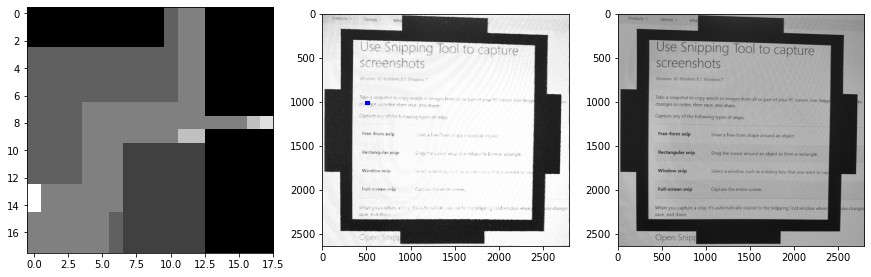

In [50]:
pim = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
pim_original = pim.copy()
for y, x in coordinates:
    pim[y-z:y+z, x-z:x+z] = pim_original[y, x]
    
n_pixel = 3
nx, ny = tuple(np.array([width, height]) // int(d * n_pixel))
y_off, x_off = (500, 1000)
h, w = (height//ny, width//nx)
rect = patches.Rectangle((y_off, x_off), h, w, linewidth=3, edgecolor='b', facecolor='none')

print(h, w)

_, axes = plt.subplots(ncols=3, figsize=(15,30))
axes[0].imshow(pim[y_off:y_off+h, x_off:x_off+w], 'gray')
axes[1].imshow(pim, cmap='gray')
axes[1].add_patch(rect)
axes[2].imshow(pim_original, cmap='gray')
plt.show()

In [80]:
demoire = np.zeros(pim.shape)
mask = np.ones(pim.shape)

for y, x in coordinates:
    ymin = y-z; ymax = y+z
    xmin = x-z; xmax = x+z
    
    mask[ymin:ymax+1, xmin:xmax+1] += 1
    demoire[ymin:ymax+1, xmin:xmax+1] += pim_original[ymin:ymax+1, xmin:xmax+1]

demoire /= mask

pim_original = pim_original.astype('uint32')
for y in range(int(demoire.shape[0])):
    for x in range(int(demoire.shape[1])):
        if demoire[y][x] == 0:
            demoire[y][x] = pim_original[y][x]



In [82]:
from PIL import Image

demoire = demoire.astype("uint8")
pim_image = Image.fromarray(demoire)
pim_image.save('demoire.png')

print(pim)
pim_image=Image.fromarray(pim)
pim_image.save('pim.png')

pim_original_image=Image.fromarray(pim_original)
pim_image.save('pim_original.png')

im_image = Image.fromarray(im)
im_image.save('original.png')

[[173 188 146 ... 180 134 122]
 [166 193 154 ...  61  47  52]
 [179 205 168 ...  74  57  66]
 ...
 [249 249 249 ... 170 227 240]
 [249 249 249 ... 116 199 235]
 [146 135 153 ... 101 134 204]]
